In [55]:
from harris_corner_detector import get_harris_corners
from feature_functions import improved_ncc_matching
from image_warping import ransac, warp_image
import glob
import cv2
from matplotlib.patches import Circle, ConnectionPatch

import imageIO.readwrite as IORW
import imageProcessing.pixelops as IPPixelOps
import imageProcessing.utilities as IPUtils
import imageProcessing.smoothing as IPSmooth

from matplotlib import pyplot
import numpy as np

In [6]:
# takes two images (of the same pixel size!) as input and returns a combined image of double the image width
def prepareMatchingImage(left_pixel_array, right_pixel_array, image_width, image_height):

    matchingImage = IPUtils.createInitializedGreyscalePixelArray(image_width * 2, image_height)
    for y in range(image_height):
        for x in range(image_width):
            matchingImage[y][x] = left_pixel_array[y][x]
            matchingImage[y][image_width + x] = right_pixel_array[y][x]

    return matchingImage

In [2]:
filenames = sorted(glob.glob("images/WestAuckland/*"))
filenames = filenames[:6]

In [48]:
left_image = cv2.imread('images/WestAuckland/WestAuckland3.png')
right_image = cv2.imread('images/WestAuckland/WestAuckland2.png')
px_array_left = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
px_array_right = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)
px_array_left = cv2.resize(px_array_left, (750,1000))
px_array_right = cv2.resize(px_array_right, (750,1000))

left_height, left_width = px_array_left.shape
right_height, right_width = px_array_right.shape
print(left_width, left_height, right_width, right_height)
px_array_left = IPSmooth.computeGaussianAveraging3x3(px_array_left, left_width, left_height)
px_array_left = IPPixelOps.scaleTo0And255AndQuantize(px_array_left, left_width, left_height)

px_array_right = IPSmooth.computeGaussianAveraging3x3(px_array_right, right_width, right_height)
px_array_right = IPPixelOps.scaleTo0And255AndQuantize(px_array_right, right_width, right_height)

left_im_corners = get_harris_corners(px_array_left, blur_kernal_size=5, adaptive_threshold=False)
right_im_corners = get_harris_corners(px_array_right, blur_kernal_size=5, adaptive_threshold=False)

improved_matches_list = improved_ncc_matching(px_array_left, px_array_right, left_im_corners, right_im_corners, window_size=15)
H = ransac(improved_matches_list, 1000, 3)
left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2HSV)
right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2HSV)
warped = warp_image('images/WestAuckland/WestAuckland3.png', 'images/WestAuckland/WestAuckland2.png', H, crop=True)

750 1000 750 1000
before scaling, min value = 0, max value = 254.99999999999994
before scaling, min value = 0, max value = 254.99999999999994


In [64]:
H

array([[ 2.28469084e-03, -2.69661868e-05, -9.99038004e-01],
       [ 1.61397926e-04,  2.25106562e-03, -4.36851846e-02],
       [ 2.91697311e-07, -8.08817490e-09,  2.08753131e-03]])

In [69]:
H = ransac(improved_matches_list, 1000, 3)
H

array([[ 2.28469084e-03, -2.69661868e-05, -9.99038004e-01],
       [ 1.61397926e-04,  2.25106562e-03, -4.36851846e-02],
       [ 2.91697311e-07, -8.08817490e-09,  2.08753131e-03]])

In [70]:
#H = ransac(improved_matches_list, 1000, 16)
warped = warp_image('images/WestAuckland/WestAuckland3.png', 'images/WestAuckland/WestAuckland2.png', H, crop=False)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
cv2.imwrite("westauckland_2_3_test.png", warped)

True

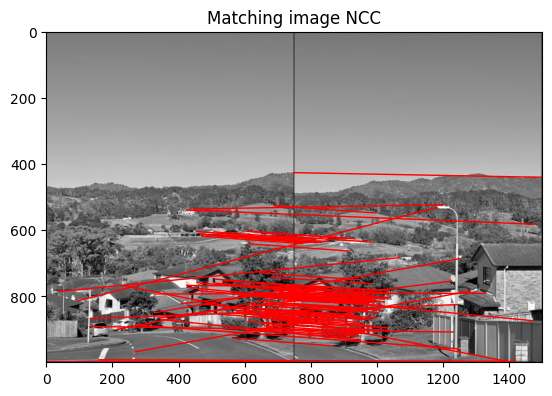

In [61]:
matchingImage = prepareMatchingImage(px_array_left, px_array_right, left_width, left_height)

pyplot.imshow(matchingImage, cmap='gray')
ax = pyplot.gca()
ax.set_title("Matching image NCC")

#Plot matches
matches = improved_matches_list
for p1, p2 in matches:
    connection = ConnectionPatch(p1, (p2[0] + left_width, p2[1]), "data", edgecolor="r", linewidth=1)
    ax.add_artist(connection)

pyplot.show()

In [50]:
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

In [51]:
cv2.imwrite("westauckland_2_3.png", warped)

True